My beloved [SF Tsunami Master Team](http://sftsunami.org/) had planned a great picnic for this week end. For the second year in a row the plan had to be canceled due to inclement weather. 

I admit I sneered at the idea of having the picnic the same month as last year, considering that it got canceled once. However, forming opinions based on a sample size of two with a sprinkle of gut feeling is not the way a Scientist does things, so I thought it would be interesting and constructive to pull some data to validate or disprove my prejudice and to provide a valid alternative.

My hypothesis is quite simple: in April chances of rain are way higher than in May, while temperatures are pretty constant, so the latter would be a better option to plan outdoor activities.

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd

import urllib.request
from bs4 import BeautifulSoup

import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


With a quick Google search I ran into [this](ggweather.com) site which reports monthly and daily information about temperature and precipitations. 

The format is quite easy to scrape. The data I'm interested in are the monthly average temperatures and the number of rainy days per month.

In [3]:
class PicNicPlanner(object):
    
    RAIN_URL = 'http://ggweather.com/sf/daily.html'
    TEMP_URL = 'http://ggweather.com/sf/monthly%20mean%20temps.html'
    
    def __init__(self):
        self.rain_table = None
        self.temperature_table = None
    
    def _read_soup(self, url, split='\t'):
        flob = urllib.request.urlopen(url)
        s = flob.read()
        flob.close()
        soup = BeautifulSoup(s, "lxml")
        return [s for s in soup.findAll('table')[1].get_text().split(split) if len(s)>0]
    
    def _clean_rain(self, row):
        return pd.Series(row.strip().split('\n')[1:]).astype(float) 
    
    def get_rains(self):
        if self.rain_table is None:
            raw_rows = self._read_soup(self.RAIN_URL, '\xa0')
            cleaned_rows = pd.concat(
                [self._clean_rain(row) for row in raw_rows if 'Days' in row and 'Rain' not in row], 
                axis=1)
            cleaned_rows.index = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
                                  'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
            self.rain_table = cleaned_rows.transpose()
            self.rain_table.index = list(range(2008,2018))
        return self.rain_table
        
    def _clean_temperatures(self, row):
        if len(row) > 1 and not (
            'Copyright' in row or 
            'Reproduction' in row or 
            'San Francisco' in row):
            return pd.Series(row.strip().split('\n'))
    
    def get_temperatures(self):
        if self.temperature_table is None:
            raw_rows = self._read_soup(self.TEMP_URL)
            cleaned_rows = pd.concat([self._clean_temperatures(row) 
                                      for row in raw_rows[2:]],axis=1)
            cleaned_rows.columns = cleaned_rows.iloc[0]
            cleaned_rows = cleaned_rows.drop(0).dropna(axis=0)
            cleaned_rows.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual']
            self.temperature_table = cleaned_rows.transpose()
            self.temperature_table = self.temperature_table.astype(float)
        return self.temperature_table
        
        
def num_days(month):
    if month in ['Nov', 'Apr', 'Jun', 'Sep']:
        return 30
    if month == 'Feb':
        return 28
    return 31
    

In [4]:
planner = PicNicPlanner()
temp = planner.get_temperatures()
rains = planner.get_rains()

The data seems to 



So, it turns out that the data confirms that having a picnic in SF in April is probably not the best idea if you want to frolic in the Sun, while your chances of having a successful event in May are almost **three times higher!** In the figure belowwe can see how April has a 23% chances of rain! Basically one day out of 4. As late as November we can have better conditions than in April, and yet I doubt people would consider reasonable to organize a picnic in November.

(50, 65)

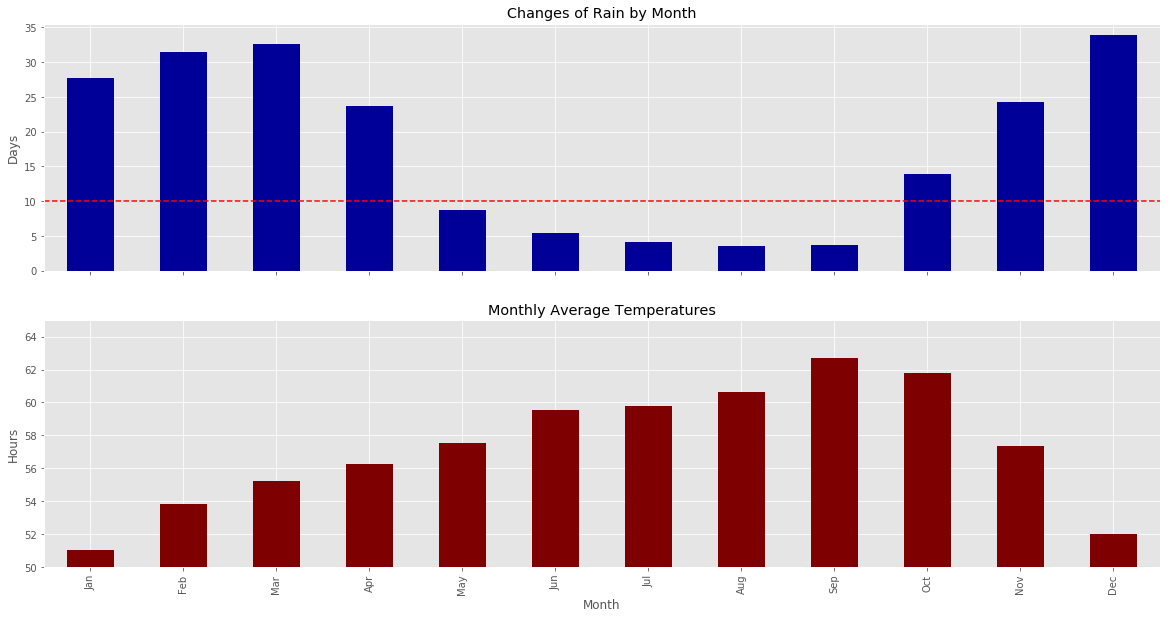

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#axes[0].set_title('Average Rainy Days by Month')
axes[0].set_title('Changes of Rain by Month')
axes[1].set_title('Monthly Average Temperatures')
axes[0].axhline(10, color='r', linestyle='--')

(100*rains.mean() / rains.columns.map(num_days))[months].plot(kind='bar', ax=axes[0], sharex=True, color='#000099')
axes[0].set_ylabel('Days')
temp.mean()[months].plot(kind='bar', ax=axes[1], color='#7f0000')
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Month')
axes[1].set_ylim([50,65]) # never too hot, never too warm

In [290]:
pd.DataFrame({'Daily Chances of Rain': 100*rains.mean() / rains.columns.map(num_days)}).loc[months]

,Daily Chances of Rain
Jan,27.741935
Feb,31.428571
Mar,32.580645
Apr,23.666667
May,8.709677
Jun,5.416667
Jul,4.193548
Aug,3.548387
Sep,3.666667
Oct,13.870968


The takehome message should be:
- April is too soon to plan a picnic
- May is quite dry
- SF's weather is good enough to allow you to hang out outside as late as November!

[source](https://github.com/mrpozzi/mrpozzi.github.io/blob/master/notebooks/PicnicInSF.ipynb)